**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


**Check data**

In [2]:
FOLDER = "annotation_chipseq_histone"

In [3]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    FOLDER)
for(fname in dir(fdiry)){print(fname)}

[1] "accession_info_peaks.tsv"
[1] "description.tsv"
[1] "download.sh"
[1] "K562.ENCSR000AKP.ENCFF544LXB.H3K27ac.bed.gz"
[1] "K562.ENCSR000AKQ.ENCFF323WOT.H3K27me3.bed.gz"
[1] "K562.ENCSR000AKR.ENCFF193ERO.H3K36me3.bed.gz"
[1] "K562.ENCSR000AKS.ENCFF135ZLM.H3K4me1.bed.gz"
[1] "K562.ENCSR000AKT.ENCFF749KLQ.H3K4me2.bed.gz"
[1] "K562.ENCSR000AKU.ENCFF689QIJ.H3K4me3.bed.gz"
[1] "K562.ENCSR000AKV.ENCFF891CHI.H3K9ac.bed.gz"
[1] "K562.ENCSR000AKW.ENCFF462AVD.H3K9me1.bed.gz"
[1] "K562.ENCSR000AKX.ENCFF909RKY.H4K20me1.bed.gz"
[1] "K562.ENCSR000APC.ENCFF213OTI.H2AFZ.bed.gz"
[1] "K562.ENCSR000APD.ENCFF209OQD.H3K79me2.bed.gz"
[1] "K562.ENCSR000APE.ENCFF963GZJ.H3K9me3.bed.gz"
[1] "K562.ENCSR000DWB.ENCFF561OUZ.H3K36me3.bed.gz"
[1] "K562.ENCSR000DWD.ENCFF706WUF.H3K4me3.bed.gz"
[1] "K562.ENCSR000EVZ.ENCFF148UQI.H3K9ac.bed.gz"
[1] "K562.ENCSR000EWA.ENCFF122CSI.H3K4me3.bed.gz"
[1] "K562.ENCSR000EWB.ENCFF801AHF.H3K27me3.bed.gz"
[1] "K562.ENCSR000EWC.ENCFF540NGG.H3K4me1.bed.gz"
[1] "K562.ENCSR668LDD.ENCFF

In [4]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input", 
    FOLDER)
for(fname in dir(fdiry)){print(fname)}

[1] "peak.annotation.K562.ENCSR000AKP.ENCFF544LXB.H3K27ac.bed.gz"
[1] "peak.annotation.K562.ENCSR000AKQ.ENCFF323WOT.H3K27me3.bed.gz"
[1] "peak.annotation.K562.ENCSR000AKR.ENCFF193ERO.H3K36me3.bed.gz"
[1] "peak.annotation.K562.ENCSR000AKS.ENCFF135ZLM.H3K4me1.bed.gz"
[1] "peak.annotation.K562.ENCSR000AKT.ENCFF749KLQ.H3K4me2.bed.gz"
[1] "peak.annotation.K562.ENCSR000AKU.ENCFF689QIJ.H3K4me3.bed.gz"
[1] "peak.annotation.K562.ENCSR000AKV.ENCFF891CHI.H3K9ac.bed.gz"
[1] "peak.annotation.K562.ENCSR000AKW.ENCFF462AVD.H3K9me1.bed.gz"
[1] "peak.annotation.K562.ENCSR000AKX.ENCFF909RKY.H4K20me1.bed.gz"
[1] "peak.annotation.K562.ENCSR000APC.ENCFF213OTI.H2AFZ.bed.gz"
[1] "peak.annotation.K562.ENCSR000APD.ENCFF209OQD.H3K79me2.bed.gz"
[1] "peak.annotation.K562.ENCSR000APE.ENCFF963GZJ.H3K9me3.bed.gz"
[1] "peak.annotation.K562.ENCSR000DWB.ENCFF561OUZ.H3K36me3.bed.gz"
[1] "peak.annotation.K562.ENCSR000DWD.ENCFF706WUF.H3K4me3.bed.gz"
[1] "peak.annotation.K562.ENCSR000EVZ.ENCFF148UQI.H3K9ac.bed.gz"
[1] "peak

## Import data

In [5]:
fdiry  = file.path(FD_RES, "results", "region", FOLDER)
fname = "description.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_cnames = dat
print(dim(dat))
dat

[1] 10  2


Name,Description
<chr>,<chr>
Chrom,"Name of the chromosome (or contig, scaffold, etc.)."
Start,The starting position of the feature in the chromosome or scaffold. The first base in a chromosome is numbered 0.
End,"The ending position of the feature in the chromosome or scaffold. The chromEnd base is not included in the display of the feature. For example, the first 100 bases of a chromosome are defined as chromStart=0, chromEnd=100, and span the bases numbered 0-99."
Name,Name given to a region (preferably unique). Use '.' if no name is assigned.
Score,"Indicates how dark the peak will be displayed in the browser (0-1000). If all scores were '0' when the data were submitted to the DCC, the DCC assigned scores 1-1000 based on signal value. Ideally the average signalValue per base spread is between 100-1000."
Strand,+/- to denote strand or orientation (whenever applicable). Use '.' if no orientation is assigned.
SignalValue,"Measurement of overall (usually, average) enrichment for the region."
pValue,Measurement of statistical significance (-log10). Use -1 if no pValue is assigned.
qValue,Measurement of statistical significance using false discovery rate (-log10). Use -1 if no qValue is assigned.


In [6]:
### init: set column names
cnames = dat_cnames$Name
cnames = c("Chrom_ATAC", "Start_ATAC", "End_ATAC", cnames, "Overlap")

### init: set file path
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input", 
    FOLDER)
fname  = paste("peak.annotation", "bed.gz", sep="*")
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
fnames = basename(fpaths)

### init: annotation and label
annotation = "ChIPseq_Histone"
labels = fnames %>% 
    str_split(., "\\.") %>%
    do.call(rbind, .) %>%
    as.data.frame %>%
    dplyr::mutate(X = paste(V6, V5, sep="_")) %>%
    dplyr::pull(X)
targets = fnames %>% 
    str_split(., "\\.") %>%
    do.call(rbind, .) %>%
    as.data.frame %>%
    dplyr::mutate(X = V6) %>%
    dplyr::pull(X)

names(fnames) = labels
names(labels) = labels
names(targets) = labels
print(fnames)

                                           H3K27ac_ENCFF544LXB 
 "peak.annotation.K562.ENCSR000AKP.ENCFF544LXB.H3K27ac.bed.gz" 
                                          H3K27me3_ENCFF323WOT 
"peak.annotation.K562.ENCSR000AKQ.ENCFF323WOT.H3K27me3.bed.gz" 
                                          H3K36me3_ENCFF193ERO 
"peak.annotation.K562.ENCSR000AKR.ENCFF193ERO.H3K36me3.bed.gz" 
                                           H3K4me1_ENCFF135ZLM 
 "peak.annotation.K562.ENCSR000AKS.ENCFF135ZLM.H3K4me1.bed.gz" 
                                           H3K4me2_ENCFF749KLQ 
 "peak.annotation.K562.ENCSR000AKT.ENCFF749KLQ.H3K4me2.bed.gz" 
                                           H3K4me3_ENCFF689QIJ 
 "peak.annotation.K562.ENCSR000AKU.ENCFF689QIJ.H3K4me3.bed.gz" 
                                            H3K9ac_ENCFF891CHI 
  "peak.annotation.K562.ENCSR000AKV.ENCFF891CHI.H3K9ac.bed.gz" 
                                           H3K9me1_ENCFF462AVD 
 "peak.annotation.K562.ENCSR000AKW.ENCFF

In [7]:
### Import data
lst = lapply(labels, function(label){
    ### set file path
    target = targets[label]
    fname = fnames[label]
    fpath = file.path(fdiry, fname)
    
    ### read data
    dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
    dat = dat %>% dplyr::mutate(
        Peak_ATAC  = paste0(Chrom_ATAC, ":", Start_ATAC, "-", End_ATAC),
        Annotation = annotation,
        Label      = label,
        Region     = paste0(Chrom, ":", Start, "-", End),
        Value      = SignalValue,
        Note       = target
    )
    return(dat)
})

### assign and show
lst_peak_annot_import = lst
print(length(lst))
head(lst[[1]])

[1] 19


Chrom_ATAC,Start_ATAC,End_ATAC,Chrom,Start,End,Name,Score,Strand,SignalValue,pValue,qValue,peak,Overlap,Peak_ATAC,Annotation,Label,Region,Value,Note
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
chr1,137737,139544,chr1,137650,138169,Peak_16228,317,.,9.24885,31.74444,29.32013,338,432,chr1:137737-139544,ChIPseq_Histone,H3K27ac_ENCFF544LXB,chr1:137650-138169,9.24885,H3K27ac
chr1,137737,139544,chr1,138356,139236,Peak_19531,228,.,7.55215,22.82356,20.52066,178,880,chr1:137737-139544,ChIPseq_Histone,H3K27ac_ENCFF544LXB,chr1:138356-139236,7.55215,H3K27ac
chr1,137737,139544,chr1,139285,139490,Peak_33716,88,.,4.27130,8.85756,6.82864,172,205,chr1:137737-139544,ChIPseq_Histone,H3K27ac_ENCFF544LXB,chr1:139285-139490,4.27130,H3K27ac
chr1,777949,779437,chr1,777712,778823,Peak_6597,939,.,19.33186,93.91751,90.86520,823,874,chr1:777949-779437,ChIPseq_Histone,H3K27ac_ENCFF544LXB,chr1:777712-778823,19.33186,H3K27ac
chr1,777949,779437,chr1,778887,779412,Peak_16912,296,.,8.99031,29.63080,27.23310,306,525,chr1:777949-779437,ChIPseq_Histone,H3K27ac_ENCFF544LXB,chr1:778887-779412,8.99031,H3K27ac
chr1,826754,828040,chr1,826565,827901,Peak_8064,783,.,17.13224,78.32069,75.40894,869,1147,chr1:826754-828040,ChIPseq_Histone,H3K27ac_ENCFF544LXB,chr1:826565-827901,17.13224,H3K27ac


In [8]:
print(summary(lst[[1]]$Score))
print(summary(lst[[1]]$SignalValue))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   20.0    87.0   212.0   383.1   674.0  1000.0 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.500   3.659   5.852   8.687  11.482  56.806 


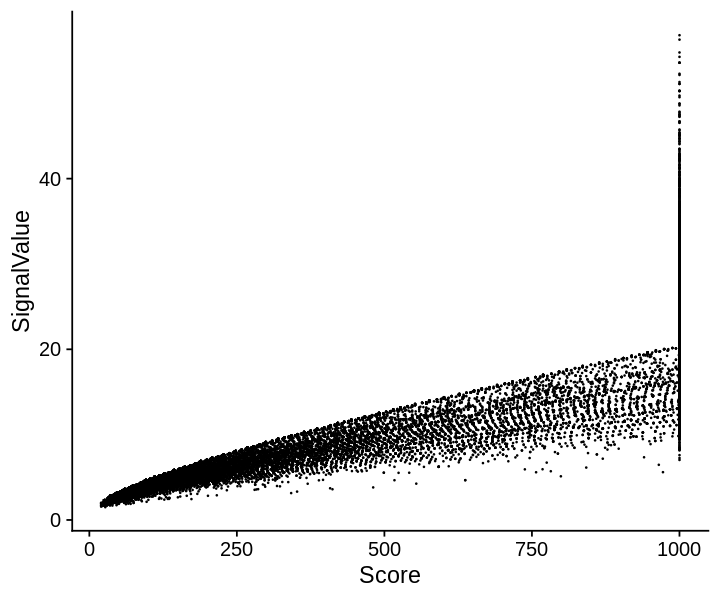

In [9]:
dat = lst[[1]]
gpt = ggplot(dat, aes(x=Score, y=SignalValue)) + geom_point(size=0.1) + theme_cowplot()
options(repr.plot.height=5, repr.plot.width=6)
print(gpt)

## Arrange and summarize

In [10]:
### init
lst = lst_peak_annot_import
dat = bind_rows(lst)

### summarize
dat = dat %>%
    dplyr::group_by(Chrom_ATAC, Start_ATAC, End_ATAC, Peak_ATAC, Annotation, Label) %>%
    dplyr::summarise(
        Count  = n(), 
        Region = paste(Region, collapse="|"),
        Score  = mean(Value),
        Note   = paste(unique(sort(Note)), collapse="|"),
        .groups = "drop")

## arrange
dat = dat %>% 
    dplyr::arrange(Chrom_ATAC, Start_ATAC, End_ATAC) %>%
    dplyr::select(-Chrom_ATAC, -Start_ATAC, -End_ATAC) %>%
    dplyr::rename("Peak" = Peak_ATAC)

### assign and show
dat_peak_annot_summary = dat
print(dim(dat))
head(dat)

[1] 515432      7


Peak,Annotation,Label,Count,Region,Score,Note
<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>
chr1:16015-16477,ChIPseq_Histone,H3K36me3_ENCFF193ERO,1,chr1:16092-16380,4.56269,H3K36me3
chr1:16015-16477,ChIPseq_Histone,H3K36me3_ENCFF561OUZ,1,chr1:16209-16339,4.29995,H3K36me3
chr1:118518-118743,ChIPseq_Histone,H3K9ac_ENCFF891CHI,1,chr1:118435-119129,12.03536,H3K9ac
chr1:137737-139544,ChIPseq_Histone,H3K27ac_ENCFF544LXB,3,chr1:137650-138169|chr1:138356-139236|chr1:139285-139490,7.02410,H3K27ac
chr1:137737-139544,ChIPseq_Histone,H3K36me3_ENCFF193ERO,1,chr1:139300-139473,3.45776,H3K36me3
chr1:137737-139544,ChIPseq_Histone,H3K4me2_ENCFF749KLQ,3,chr1:137654-138013|chr1:138363-138566|chr1:138755-139628,11.87772,H3K4me2


## Explore and check results

In [11]:
dat = dat_peak_annot_summary
table(dat$Note)


   H2AFZ  H3K27ac H3K27me3 H3K36me3  H3K4me1  H3K4me2  H3K4me3 H3K79me2 
   53494    32987    60860    36529    93879    42445    83241    20940 
  H3K9ac  H3K9me1  H3K9me3 H4K20me1 
   73762     3291     1665    12339 

In [12]:
dat = dat_peak_annot_summary
lst = split(dat, dat$Label)
lst = lapply(lst, function(dat){
    table(dat$Count)
})
lst

$H2AFZ_ENCFF213OTI

    1     2     3     4     5     6 
47314  5510   602    60     6     2 

$H3K27ac_ENCFF544LXB

    1     2     3     4     5 
30050  2792   134     8     3 

$H3K27me3_ENCFF323WOT

    1     2     3     4     5 
16757  2067   309    42     6 

$H3K27me3_ENCFF801AHF

    1     2     3     4 
40750   891    36     2 

$H3K36me3_ENCFF193ERO

    1     2     3     4 
24152   813    74     7 

$H3K36me3_ENCFF561OUZ

   1    2    3    4    5    6    7 
9473 1587  332   73   13    3    2 

$H3K4me1_ENCFF135ZLM

    1     2     3     4     5 
36657  2952   213    11     1 

$H3K4me1_ENCFF540NGG

    1     2     3     4     5 
48805  4846   366    26     2 

$H3K4me2_ENCFF749KLQ

    1     2     3     4 
39325  2929   179    12 

$H3K4me3_ENCFF122CSI

    1     2     3     4     5 
16450  1243    52     5     1 

$H3K4me3_ENCFF689QIJ

    1     2     3     4     5 
25853  2317   132    11     1 

$H3K4me3_ENCFF706WUF

    1     2     3     4 
16389  2219   142    10 

$H3K

## Save results

In [13]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input", 
    "summary")
fname = "peak.summary.chipseq_histone.tsv"
fpath = file.path(fdiry, fname)

dat = dat_peak_annot_summary
write_tsv(dat, fpath)